In [1]:
import pandas as pd
import numpy as np

In [4]:
art_daily_no_noise = pd.read_csv("../data/artificialNoAnomaly/art_daily_no_noise.csv")
art_daily_no_noise.head(5)

,timestamp,value
0,2014-04-01 00:00:00,20.0
1,2014-04-01 00:05:00,20.0
2,2014-04-01 00:10:00,20.0
3,2014-04-01 00:15:00,20.0
4,2014-04-01 00:20:00,20.0


In [6]:
art_daily_no_noise.isnull().sum()

timestamp    0
value        0
dtype: int64

In [8]:
art_daily_no_noise.describe()

,value
count,4032.000000
mean,42.499960
std,27.954349
min,20.000000
25%,20.000000
50%,20.288000
75%,79.616000
max,79.999969


In [10]:
art_daily_no_noise.shape

(4032, 2)

In [11]:
art_daily_no_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [12]:
art_daily_no_noise

,timestamp,value
0,2014-04-01 00:00:00,20.00000
1,2014-04-01 00:05:00,20.00000
2,2014-04-01 00:10:00,20.00000
3,2014-04-01 00:15:00,20.00000
4,2014-04-01 00:20:00,20.00000
...,...,...
4027,2014-04-14 23:35:00,20.00384
4028,2014-04-14 23:40:00,20.00384
4029,2014-04-14 23:45:00,20.00384
4030,2014-04-14 23:50:00,20.00384


In [13]:
art_daily_no_noise_value = art_daily_no_noise["value"]
art_daily_no_noise_value

0       20.00000
1       20.00000
2       20.00000
3       20.00000
4       20.00000
          ...   
4027    20.00384
4028    20.00384
4029    20.00384
4030    20.00384
4031    20.00384
Name: value, Length: 4032, dtype: float64

In [32]:
X = art_daily_no_noise["value"].values.reshape(-1,1)
X

array([[20.     ],
       [20.     ],
       [20.     ],
       ...,
       [20.00384],
       [20.00384],
       [20.00384]], shape=(4032, 1))

# isolation Forest

In [1]:
from sklearn.ensemble import IsolationForest

In [23]:
model = IsolationForest(
    n_estimators = 100,
    random_state=42
)

In [24]:
model.fit(X)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",'auto'
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [2]:
import joblib

['isolation_forest.joblib']

In [26]:
art_daily_jumpsdown = pd.read_csv("../data/artificialWithAnomaly/art_daily_jumpsdown.csv")
art_daily_jumpsdown.head(2)

,timestamp,value
0,2014-04-01 00:00:00,18.090486
1,2014-04-01 00:05:00,20.359843


In [29]:
y = art_daily_jumpsdown["value"].values.reshape(-1,1)

In [30]:
y

array([[18.09048623],
       [20.35984259],
       [21.10546985],
       ...,
       [19.59468929],
       [19.76781709],
       [20.47915647]], shape=(4032, 1))

In [31]:
predictions = model.predict(y)

In [33]:
predictions

array([ 1, -1, -1, ...,  1,  1, -1], shape=(4032,))

In [34]:
counts = pd.Series(predictions).value_counts()

In [35]:
counts

-1    2392
 1    1640
Name: count, dtype: int64

In [3]:
model1 = IsolationForest(
    n_estimators = 100,
    contamination=0.05,
    random_state=42
)

In [5]:
joblib.dump(model1,"isolation_forest.joblib")

['isolation_forest.joblib']

In [38]:
model1.fit(X)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [42]:
prediction1 = model1.predict(y)

In [43]:
prediction1

array([1, 1, 1, ..., 1, 1, 1], shape=(4032,))

In [44]:
counts = pd.Series(prediction1).value_counts()

In [45]:
counts

 1    3960
-1      72
Name: count, dtype: int64

In [46]:
import matplotlib.pyplot as plt

In [48]:
art_daily_jumpsdown["anamoly"] = prediction1

In [49]:
art_daily_jumpsdown

,timestamp,value,anamoly
0,2014-04-01 00:00:00,18.090486,1
1,2014-04-01 00:05:00,20.359843,1
2,2014-04-01 00:10:00,21.105470,1
3,2014-04-01 00:15:00,21.151585,1
4,2014-04-01 00:20:00,18.137141,1
...,...,...,...
4027,2014-04-14 23:35:00,18.269290,1
4028,2014-04-14 23:40:00,19.087351,1
4029,2014-04-14 23:45:00,19.594689,1
4030,2014-04-14 23:50:00,19.767817,1


In [129]:
anomalies = art_daily_jumpsdown[art_daily_jumpsdown["anamoly"]== -1]

In [130]:
anomalies

,timestamp,value,anamoly
109,2014-04-01 09:05:00,66.291606,-1
114,2014-04-01 09:30:00,67.820880,-1
216,2014-04-01 18:00:00,32.555578,-1
220,2014-04-01 18:20:00,33.613302,-1
224,2014-04-01 18:40:00,34.057950,-1
...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1
3683,2014-04-13 18:55:00,33.080317,-1
3854,2014-04-14 09:10:00,67.173521,-1
3964,2014-04-14 18:20:00,33.941804,-1


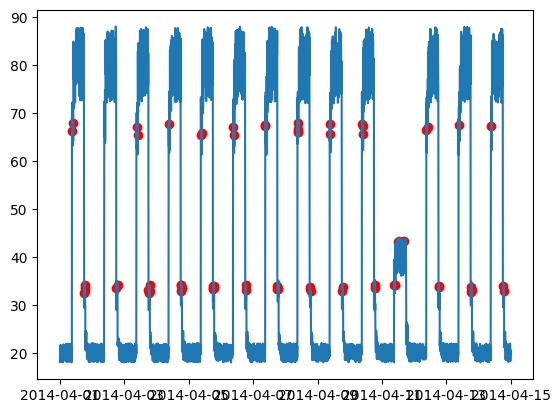

In [131]:
plt.plot(art_daily_jumpsdown["timestamp"], art_daily_jumpsdown["value"])
plt.scatter(anomalies["timestamp"],anomalies["value"], color="red")

In [132]:
anomalies

,timestamp,value,anamoly
109,2014-04-01 09:05:00,66.291606,-1
114,2014-04-01 09:30:00,67.820880,-1
216,2014-04-01 18:00:00,32.555578,-1
220,2014-04-01 18:20:00,33.613302,-1
224,2014-04-01 18:40:00,34.057950,-1
...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1
3683,2014-04-13 18:55:00,33.080317,-1
3854,2014-04-14 09:10:00,67.173521,-1
3964,2014-04-14 18:20:00,33.941804,-1


In [133]:
anomalies = anomalies.sort_values(by="timestamp",ascending=True)

In [134]:
anomalies

,timestamp,value,anamoly
109,2014-04-01 09:05:00,66.291606,-1
114,2014-04-01 09:30:00,67.820880,-1
216,2014-04-01 18:00:00,32.555578,-1
220,2014-04-01 18:20:00,33.613302,-1
224,2014-04-01 18:40:00,34.057950,-1
...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1
3683,2014-04-13 18:55:00,33.080317,-1
3854,2014-04-14 09:10:00,67.173521,-1
3964,2014-04-14 18:20:00,33.941804,-1


In [135]:
anomalies["timestamp"] = pd.to_datetime(anomalies["timestamp"])

In [136]:
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 109 to 3968
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  72 non-null     datetime64[ns]
 1   value      72 non-null     float64       
 2   anamoly    72 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 KB


In [137]:
anomalies = anomalies.sort_values("timestamp")

In [138]:
anomalies["time_difference"] = anomalies["timestamp"].diff()

In [139]:
anomalies

,timestamp,value,anamoly,time_difference
109,2014-04-01 09:05:00,66.291606,-1,NaT
114,2014-04-01 09:30:00,67.820880,-1,0 days 00:25:00
216,2014-04-01 18:00:00,32.555578,-1,0 days 08:30:00
220,2014-04-01 18:20:00,33.613302,-1,0 days 00:20:00
224,2014-04-01 18:40:00,34.057950,-1,0 days 00:20:00
...,...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1,0 days 00:20:00
3683,2014-04-13 18:55:00,33.080317,-1,0 days 00:30:00
3854,2014-04-14 09:10:00,67.173521,-1,0 days 14:15:00
3964,2014-04-14 18:20:00,33.941804,-1,0 days 09:10:00


In [140]:
anomalies["new_incident"] = (anomalies["time_difference"] > pd.Timedelta(minutes=10)) | (anomalies["time_difference"].isna())

In [141]:
anomalies['incident_id'] = anomalies['new_incident'].cumsum()

In [142]:
anomalies

,timestamp,value,anamoly,time_difference,new_incident,incident_id
109,2014-04-01 09:05:00,66.291606,-1,NaT,True,1
114,2014-04-01 09:30:00,67.820880,-1,0 days 00:25:00,True,2
216,2014-04-01 18:00:00,32.555578,-1,0 days 08:30:00,True,3
220,2014-04-01 18:20:00,33.613302,-1,0 days 00:20:00,True,4
224,2014-04-01 18:40:00,34.057950,-1,0 days 00:20:00,True,5
...,...,...,...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1,0 days 00:20:00,True,48
3683,2014-04-13 18:55:00,33.080317,-1,0 days 00:30:00,True,49
3854,2014-04-14 09:10:00,67.173521,-1,0 days 14:15:00,True,50
3964,2014-04-14 18:20:00,33.941804,-1,0 days 09:10:00,True,51


In [96]:
anomalies["incident_id"].max()

np.int64(52)

In [143]:
anomalies.head(40)

,timestamp,value,anamoly,time_difference,new_incident,incident_id
109,2014-04-01 09:05:00,66.291606,-1,NaT,True,1
114,2014-04-01 09:30:00,67.820880,-1,0 days 00:25:00,True,2
216,2014-04-01 18:00:00,32.555578,-1,0 days 08:30:00,True,3
220,2014-04-01 18:20:00,33.613302,-1,0 days 00:20:00,True,4
224,2014-04-01 18:40:00,34.057950,-1,0 days 00:20:00,True,5
225,2014-04-01 18:45:00,32.884958,-1,0 days 00:05:00,False,5
504,2014-04-02 18:00:00,33.620965,-1,0 days 23:15:00,True,6
515,2014-04-02 18:55:00,34.215879,-1,0 days 00:55:00,True,7
687,2014-04-03 09:15:00,67.152851,-1,0 days 14:20:00,True,8
695,2014-04-03 09:55:00,65.349525,-1,0 days 00:40:00,True,9


In [106]:
def calculate_slope(y):
    x= np.arange(len(y))

    return np.polyfit(x,y,1)[0]

In [108]:
anomalies["slope"] = anomalies["value"].rolling(window=12).apply(calculate_slope)

In [109]:
anomalies

,timestamp,value,anamoly,time_difference,new_incident,incident_id,mean,std,slope
109,2014-04-01 09:05:00,66.291606,-1,NaT,True,1,NaN,NaN,NaN
114,2014-04-01 09:30:00,67.820880,-1,0 days 00:25:00,True,2,NaN,NaN,NaN
216,2014-04-01 18:00:00,32.555578,-1,0 days 08:30:00,True,3,NaN,NaN,NaN
220,2014-04-01 18:20:00,33.613302,-1,0 days 00:20:00,True,4,NaN,NaN,NaN
224,2014-04-01 18:40:00,34.057950,-1,0 days 00:20:00,True,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1,0 days 00:20:00,True,48,45.183276,13.832307,-0.007244
3683,2014-04-13 18:55:00,33.080317,-1,0 days 00:30:00,True,49,45.099045,13.908858,-0.976933
3854,2014-04-14 09:10:00,67.173521,-1,0 days 14:15:00,True,50,47.101998,15.265275,-0.217049
3964,2014-04-14 18:20:00,33.941804,-1,0 days 09:10:00,True,51,46.323793,15.709386,-0.896926


In [110]:
anomalies.shape

(72, 9)

In [113]:
art_daily_jumpsdown = art_daily_jumpsdown.sort_values("timestamp")
    
art_daily_jumpsdown["timestamp"] = pd.to_datetime(art_daily_jumpsdown["timestamp"])

In [114]:
art_daily_jumpsdown

,timestamp,value,anamoly
0,2014-04-01 00:00:00,18.090486,1
1,2014-04-01 00:05:00,20.359843,1
2,2014-04-01 00:10:00,21.105470,1
3,2014-04-01 00:15:00,21.151585,1
4,2014-04-01 00:20:00,18.137141,1
...,...,...,...
4027,2014-04-14 23:35:00,18.269290,1
4028,2014-04-14 23:40:00,19.087351,1
4029,2014-04-14 23:45:00,19.594689,1
4030,2014-04-14 23:50:00,19.767817,1


In [121]:
WINDOW_SIZE = 12

values = art_daily_jumpsdown["value"].values
timestamps = art_daily_jumpsdown["timestamp"].values

windows = []
window_end_times = []

for i in range(WINDOW_SIZE - 1, len(values)):
    window = values[i - WINDOW_SIZE + 1 : i + 1]
    windows.append(window)
    window_end_times.append(timestamps[i])

windows = np.array(windows)

In [122]:
windows.shape

(4021, 12)

In [123]:
features = []

for window in windows:
    mean_val = np.mean(window)
    std_val = np.std(window)
    
    # Trend (slope)
    x = np.arange(len(window))
    slope = np.polyfit(x, window, 1)[0]
    
    features.append([mean_val, std_val, slope])

features = np.array(features)


In [125]:
features.shape

(4021, 3)

In [126]:
features_df = pd.DataFrame(
    features,
    columns=["mean", "std", "slope"]
)

features_df["window_end_timestamp"] = window_end_times

features_df = features_df[
    ["window_end_timestamp", "mean", "std", "slope"]
]


In [127]:
features_df.head()


,window_end_timestamp,mean,std,slope
0,2014-04-01 00:55:00,20.031891,1.251631,-0.014740
1,2014-04-01 01:00:00,20.281952,1.132907,-0.062242
2,2014-04-01 01:05:00,20.219927,1.147229,-0.084333
3,2014-04-01 01:10:00,20.188998,1.127776,-0.024297
4,2014-04-01 01:15:00,19.960168,1.186311,-0.049134


In [128]:
features_df.shape

(4021, 4)

In [144]:
incident_df = anomalies.copy()

In [145]:
incident_df

,timestamp,value,anamoly,time_difference,new_incident,incident_id
109,2014-04-01 09:05:00,66.291606,-1,NaT,True,1
114,2014-04-01 09:30:00,67.820880,-1,0 days 00:25:00,True,2
216,2014-04-01 18:00:00,32.555578,-1,0 days 08:30:00,True,3
220,2014-04-01 18:20:00,33.613302,-1,0 days 00:20:00,True,4
224,2014-04-01 18:40:00,34.057950,-1,0 days 00:20:00,True,5
...,...,...,...,...,...,...
3677,2014-04-13 18:25:00,33.759934,-1,0 days 00:20:00,True,48
3683,2014-04-13 18:55:00,33.080317,-1,0 days 00:30:00,True,49
3854,2014-04-14 09:10:00,67.173521,-1,0 days 14:15:00,True,50
3964,2014-04-14 18:20:00,33.941804,-1,0 days 09:10:00,True,51


In [146]:
incident_df["timestamp"] = pd.to_datetime(incident_df["timestamp"])

In [147]:
incident_start = (
    incident_df.groupby("incident_id")["timestamp"].min().sort_values()
)

In [148]:
incident_start

incident_id
1    2014-04-01 09:05:00
2    2014-04-01 09:30:00
3    2014-04-01 18:00:00
4    2014-04-01 18:20:00
5    2014-04-01 18:40:00
6    2014-04-02 18:00:00
7    2014-04-02 18:55:00
8    2014-04-03 09:15:00
9    2014-04-03 09:55:00
10   2014-04-03 18:00:00
11   2014-04-03 18:30:00
12   2014-04-04 09:00:00
13   2014-04-04 18:05:00
14   2014-04-04 18:35:00
15   2014-04-05 09:20:00
16   2014-04-05 09:45:00
17   2014-04-05 18:05:00
18   2014-04-05 18:50:00
19   2014-04-06 09:05:00
20   2014-04-06 09:40:00
21   2014-04-06 18:20:00
22   2014-04-07 09:05:00
23   2014-04-07 18:00:00
24   2014-04-07 18:30:00
25   2014-04-08 09:10:00
26   2014-04-08 09:35:00
27   2014-04-08 18:15:00
28   2014-04-08 18:55:00
29   2014-04-09 09:00:00
30   2014-04-09 09:25:00
31   2014-04-09 18:00:00
32   2014-04-09 18:50:00
33   2014-04-10 09:20:00
34   2014-04-10 09:50:00
35   2014-04-10 18:35:00
36   2014-04-11 09:05:00
37   2014-04-11 09:20:00
38   2014-04-11 11:40:00
39   2014-04-11 12:40:00
40   2014-04-

In [149]:
features_df.head(2)

,window_end_timestamp,mean,std,slope
0,2014-04-01 00:55:00,20.031891,1.251631,-0.014740
1,2014-04-01 01:00:00,20.281952,1.132907,-0.062242


In [153]:
current_time = features_df.iloc[0]["window_end_timestamp"]

In [155]:
future_time = current_time + pd.Timedelta(minutes=30)

current_time, future_time

(Timestamp('2014-04-01 00:55:00'), Timestamp('2014-04-01 01:25:00'))

In [156]:
incident_in_future = (
    (incident_start >= current_time) & (incident_start <= future_time)
).any()

incident_in_future

np.False_

In [166]:
labels= []

for ts in features_df["window_end_timestamp"]:
    future_ts = ts + pd.Timedelta(minutes=120)

    incident_in_future = (
         (incident_start >= current_time) & (incident_start <= future_time)
    ).any()

    labels.append(1 if incident_in_future else 0)

In [167]:
features_df["incident_in_next_30min"] = labels

In [168]:
features_df

,window_end_timestamp,mean,std,slope,incident_in_next_30min
0,2014-04-01 00:55:00,20.031891,1.251631,-0.014740,0
1,2014-04-01 01:00:00,20.281952,1.132907,-0.062242,0
2,2014-04-01 01:05:00,20.219927,1.147229,-0.084333,0
3,2014-04-01 01:10:00,20.188998,1.127776,-0.024297,0
4,2014-04-01 01:15:00,19.960168,1.186311,-0.049134,0
...,...,...,...,...,...
4016,2014-04-14 23:35:00,20.216653,1.244329,-0.077059,0
4017,2014-04-14 23:40:00,20.145783,1.281846,-0.133170,0
4018,2014-04-14 23:45:00,20.081592,1.288531,-0.144402,0
4019,2014-04-14 23:50:00,19.935939,1.214877,-0.091286,0


In [169]:
features_df["incident_in_next_30min"].value_counts()

incident_in_next_30min
0    4021
Name: count, dtype: int64

In [172]:
anomalies["timestamp"] = pd.to_datetime(anomalies["timestamp"])

In [173]:
anomalies_times = anomalies["timestamp"].sort_values()

In [174]:
anomalies_times

109    2014-04-01 09:05:00
114    2014-04-01 09:30:00
216    2014-04-01 18:00:00
220    2014-04-01 18:20:00
224    2014-04-01 18:40:00
               ...        
3677   2014-04-13 18:25:00
3683   2014-04-13 18:55:00
3854   2014-04-14 09:10:00
3964   2014-04-14 18:20:00
3968   2014-04-14 18:40:00
Name: timestamp, Length: 72, dtype: datetime64[ns]

In [175]:
features_df.iloc[0]

window_end_timestamp      2014-04-01 00:55:00
mean                                20.031891
std                                  1.251631
slope                                -0.01474
incident_in_next_30min                      0
Name: 0, dtype: object

In [176]:
current_time = features_df.iloc[0]["window_end_timestamp"]
future_time = current_time + pd.Timedelta(minutes=30)

current_time, future_time

(Timestamp('2014-04-01 00:55:00'), Timestamp('2014-04-01 01:25:00'))

In [178]:
num_anomalies = (
    (anomalies_times >= current_time) &
    (anomalies_times <= future_time)
).sum()

num_anomalies

np.int64(0)

In [179]:
label = 1 if num_anomalies >= 2 else 0
label

0

In [181]:
labels = []

for ts in features_df["window_end_timestamp"]:
    future_ts = ts + pd.Timedelta(minutes=30)

    num_anomalies = (
        (anomalies_times >= ts) &
        (anomalies_times <= future_ts)
    ).sum()

    label = 1 if num_anomalies >= 2 else 0
    labels.append(label)


In [182]:
features_df["anomaly_density_alert"] = labels

In [183]:
features_df["anomaly_density_alert"].value_counts()

anomaly_density_alert
0    3905
1     116
Name: count, dtype: int64

In [184]:
features_df

,window_end_timestamp,mean,std,slope,incident_in_next_30min,anomaly_density_alert
0,2014-04-01 00:55:00,20.031891,1.251631,-0.014740,0,0
1,2014-04-01 01:00:00,20.281952,1.132907,-0.062242,0,0
2,2014-04-01 01:05:00,20.219927,1.147229,-0.084333,0,0
3,2014-04-01 01:10:00,20.188998,1.127776,-0.024297,0,0
4,2014-04-01 01:15:00,19.960168,1.186311,-0.049134,0,0
...,...,...,...,...,...,...
4016,2014-04-14 23:35:00,20.216653,1.244329,-0.077059,0,0
4017,2014-04-14 23:40:00,20.145783,1.281846,-0.133170,0,0
4018,2014-04-14 23:45:00,20.081592,1.288531,-0.144402,0,0
4019,2014-04-14 23:50:00,19.935939,1.214877,-0.091286,0,0


In [185]:
X  = features_df[["mean","std","slope"]]
y = features_df["anomaly_density_alert"]

In [186]:
X.shape, y.shape

((4021, 3), (4021,))

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    shuffle=False
)

In [190]:
X_train.shape, X_test.shape

((3216, 3), (805, 3))

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [193]:
y_pred = model.predict(X_test)

In [194]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[782,  13],
       [  5,   5]])

In [197]:
from sklearn.metrics import classification_report

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       795
           1       0.28      0.50      0.36        10

    accuracy                           0.98       805
   macro avg       0.64      0.74      0.67       805
weighted avg       0.98      0.98      0.98       805



In [199]:
y_prob = model.predict_proba(X_test)[:,1]

In [200]:
y_prob

array([0.00557682, 0.00555103, 0.00553971, 0.00556044, 0.00530929,
       0.00536725, 0.00535786, 0.00534492, 0.00516949, 0.00517259,
       0.00498408, 0.00505274, 0.00510254, 0.00511171, 0.00519543,
       0.00531395, 0.00528562, 0.00526437, 0.00538924, 0.00538738,
       0.00553443, 0.00554084, 0.0055024 , 0.00549801, 0.00546748,
       0.00544215, 0.00546479, 0.00518699, 0.00517649, 0.00518369,
       0.00518024, 0.00518427, 0.00518092, 0.00518555, 0.00522815,
       0.00517609, 0.00512394, 0.00512371, 0.00516059, 0.00523496,
       0.00507704, 0.00500016, 0.00500268, 0.00508074, 0.00516682,
       0.00528789, 0.00531673, 0.0052537 , 0.00524271, 0.07005763,
       0.13098226, 0.20896114, 0.28194067, 0.32723456, 0.3252923 ,
       0.3328875 , 0.30546872, 0.26205813, 0.18547087, 0.09372001,
       0.01410324, 0.01378721, 0.01449216, 0.01450943, 0.01431275,
       0.01559196, 0.01278127, 0.01419768, 0.01603258, 0.01582418,
       0.01731862, 0.01851819, 0.01760405, 0.01798247, 0.01825

In [201]:
threshold = 0.3

y_pred_threshold = (y_prob >= threshold).astype(int)

In [202]:
y_pred_threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [203]:
cm_thresh = confusion_matrix(y_test, y_pred_threshold)
cm_thresh

array([[773,  22],
       [  3,   7]])

In [204]:
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       795
           1       0.24      0.70      0.36        10

    accuracy                           0.97       805
   macro avg       0.62      0.84      0.67       805
weighted avg       0.99      0.97      0.98       805



In [205]:
# Train Logistic Regression with Class Weights

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
model_balanced = LogisticRegression(
    max_iter = 1000,
    class_weight = "balanced"
)

model_balanced.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [210]:
y_pred_bal = model_balanced.predict(X_test)

In [211]:
cm_bal = confusion_matrix(y_test, y_pred_bal)

In [212]:
cm_bal

array([[738,  57],
       [  1,   9]])

In [213]:
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       795
           1       0.14      0.90      0.24        10

    accuracy                           0.93       805
   macro avg       0.57      0.91      0.60       805
weighted avg       0.99      0.93      0.95       805



In [214]:
y_pred_bal = model_balanced.predict_proba(X_test)[:,1]

In [215]:
y_pred_bal

array([0.12576694, 0.12479291, 0.12441016, 0.12460464, 0.11943964,
       0.12042066, 0.12011564, 0.11987329, 0.11618681, 0.11624594,
       0.11237525, 0.1137443 , 0.11486196, 0.1150373 , 0.11685081,
       0.11965511, 0.11916459, 0.11837257, 0.12109257, 0.12090392,
       0.12394257, 0.12407367, 0.12331259, 0.12312623, 0.12253411,
       0.12235322, 0.12257852, 0.11668645, 0.1167874 , 0.11703622,
       0.11663144, 0.11672155, 0.11632444, 0.11644637, 0.11726528,
       0.11639236, 0.1150196 , 0.11507684, 0.11573058, 0.11728185,
       0.11394587, 0.11241646, 0.11245062, 0.11436243, 0.11607849,
       0.11919829, 0.11967767, 0.11837678, 0.11837073, 0.74500849,
       0.86985572, 0.92888947, 0.95445871, 0.96420369, 0.96323898,
       0.9641244 , 0.95752041, 0.94429182, 0.9061563 , 0.78629281,
       0.26261968, 0.25840415, 0.26964353, 0.26987959, 0.26840256,
       0.29030687, 0.2424699 , 0.26699255, 0.29681238, 0.29248388,
       0.31534405, 0.33041122, 0.31580042, 0.32054395, 0.32351

In [216]:
threshold = 0.4

y_pred_bal_thresh = (y_pred_bal >= threshold).astype(int)
y_pred_bal_thresh

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [217]:
print(confusion_matrix(y_test ,y_pred_bal_thresh))
print(classification_report(y_test ,y_pred_bal_thresh))

[[729  66]
 [  1   9]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       795
           1       0.12      0.90      0.21        10

    accuracy                           0.92       805
   macro avg       0.56      0.91      0.58       805
weighted avg       0.99      0.92      0.95       805



In [218]:
# Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
rf_model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    class_weight= "balanced",
    random_state = 42
)

In [221]:
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [222]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [223]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[744  51]
 [  1   9]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       795
           1       0.15      0.90      0.26        10

    accuracy                           0.94       805
   macro avg       0.57      0.92      0.61       805
weighted avg       0.99      0.94      0.96       805



In [225]:
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

In [228]:
threshold = 0.6
t_pred_rf_thresh = (y_prob_rf >= threshold).astype(int)

In [229]:
print(confusion_matrix(y_test, t_pred_rf_thresh))
print(classification_report(y_test, t_pred_rf_thresh))

[[749  46]
 [  1   9]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       795
           1       0.16      0.90      0.28        10

    accuracy                           0.94       805
   macro avg       0.58      0.92      0.62       805
weighted avg       0.99      0.94      0.96       805



In [241]:
# testing on realworld data

In [242]:
real_df = pd.read_csv("../data/realKnownCause/machine_temperature_system_failure.csv")

In [243]:
real_df.head(2)

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882


In [244]:
real_df.shape

(22695, 2)

In [245]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      22695 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [248]:
real_df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [249]:
real_df["timestamp"] = pd.to_datetime(real_df["timestamp"])

In [250]:
real_df = real_df.sort_values(by="timestamp").reset_index(drop=True)

In [251]:
real_df.shape

(22695, 2)

In [252]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22695 non-null  datetime64[ns]
 1   value      22695 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 354.7 KB


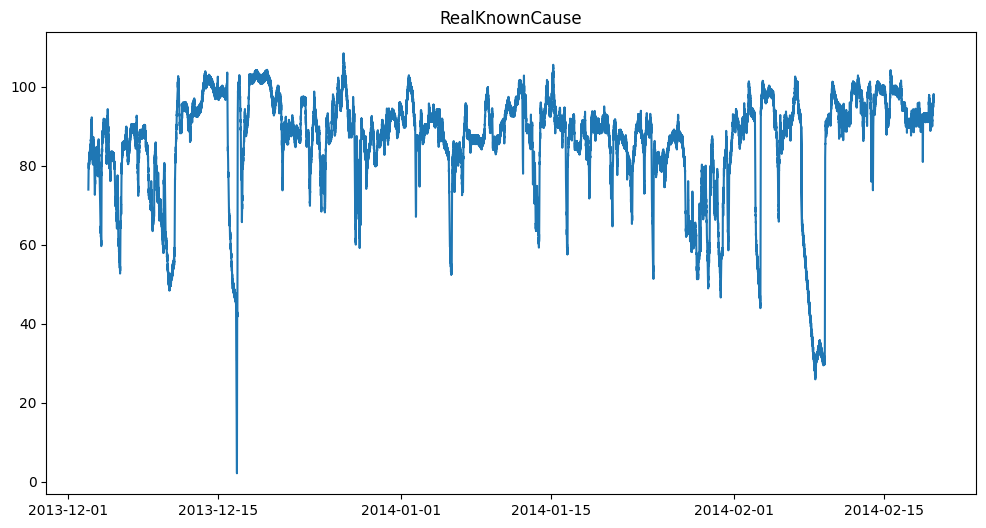

In [253]:
plt.figure(figsize = (12,6))

plt.plot(real_df["timestamp"], real_df["value"])
plt.title("RealKnownCause")
plt.show()

In [255]:
X_real = real_df[["value"]].values
X_real.shape

(22695, 1)

In [258]:
iso_model = IsolationForest(
    n_estimators = 100,
    contamination = 0.05,
    random_state=42
)

In [259]:
iso_model.fit(X_real)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [260]:
real_df["anomaly"] = iso_model.predict(X_real)

In [261]:
real_df["anomaly"].value_counts()

anomaly
 1    21566
-1     1129
Name: count, dtype: int64

In [263]:
# Split Normal vs Anomaly Points

In [267]:
normal_df = real_df[real_df["anomaly"]==1]
anomaly_df_real = real_df[real_df["anomaly"]==-1]

In [268]:
normal_df

,timestamp,value,anomaly
0,2013-12-02 21:15:00,73.967322,1
1,2013-12-02 21:20:00,74.935882,1
2,2013-12-02 21:25:00,76.124162,1
3,2013-12-02 21:30:00,78.140707,1
4,2013-12-02 21:35:00,79.329836,1
...,...,...,...
22690,2014-02-19 15:05:00,98.185415,1
22691,2014-02-19 15:10:00,97.804168,1
22692,2014-02-19 15:15:00,97.135468,1
22693,2014-02-19 15:20:00,98.056852,1


In [270]:
anomaly_df_real

,timestamp,value,anomaly
843,2013-12-05 19:30:00,54.100449,-1
847,2013-12-05 19:50:00,53.490954,-1
848,2013-12-05 19:55:00,53.839736,-1
851,2013-12-05 20:10:00,52.694906,-1
853,2013-12-05 20:20:00,53.399502,-1
...,...,...,...
21536,2014-02-15 14:55:00,103.269314,-1
21538,2014-02-15 15:05:00,103.569582,-1
21539,2014-02-15 15:10:00,103.941334,-1
21540,2014-02-15 15:15:00,103.757537,-1


Text(0.5, 1.0, 'Anomaly detection overlay')

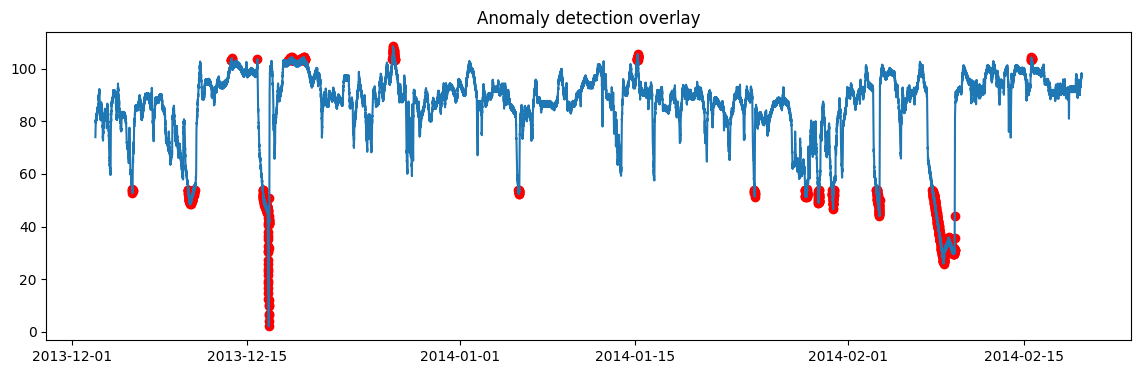

In [271]:
plt.figure(figsize = (14,4))

plt.plot(real_df["timestamp"],real_df["value"])

plt.scatter(
    anomaly_df_real["timestamp"],
    anomaly_df_real["value"],
    color = "red",
    label = "anomaly"
)

plt.title("Anomaly detection overlay")

In [276]:
anomaly_df_real = anomaly_df_real.sort_values("timestamp").reset_index(drop=True)

In [277]:
anomaly_df_real["time_diff"] = anomaly_df_real["timestamp"].diff()

In [278]:
anomaly_df_real.head(2)

,timestamp,value,anomaly,time_diff
0,2013-12-05 19:30:00,54.100449,-1,NaT
1,2013-12-05 19:50:00,53.490954,-1,0 days 00:20:00


In [279]:
# Creating incident boundary(10 min)

In [282]:
threshold = pd.Timedelta(minutes = 10)

anomaly_df_real["new_incident"] = (
    anomaly_df_real["time_diff"].isna() | (anomaly_df_real["time_diff"] > threshold)
)

In [284]:
anomaly_df_real["incident_id"] = anomaly_df_real["new_incident"].cumsum()

In [285]:
anomaly_df_real["incident_id"].nunique()

74

In [286]:
real_df.columns

Index(['timestamp', 'value', 'anomaly'], dtype='object')

In [287]:
real_incident_summary = (
    anomaly_df_real
    .groupby("incident_id")
    .agg(
        incident_start=("timestamp", "min"),
        incident_end=("timestamp", "max"),
        count_points=("timestamp", "count")
    )
    .reset_index()
)

In [288]:
real_df.describe(include="all")

,timestamp,value,anomaly
count,22695,22695.000000,22695.000000
mean,2014-01-11 06:16:49.887640576,85.926498,0.900507
min,2013-12-02 21:15:00,2.084721,-1.000000
25%,2013-12-22 14:02:30,83.080078,1.000000
50%,2014-01-11 05:50:00,89.408246,1.000000
75%,2014-01-30 22:37:30,94.016252,1.000000
max,2014-02-19 15:25:00,108.510543,1.000000
std,NaN,13.746912,0.434852


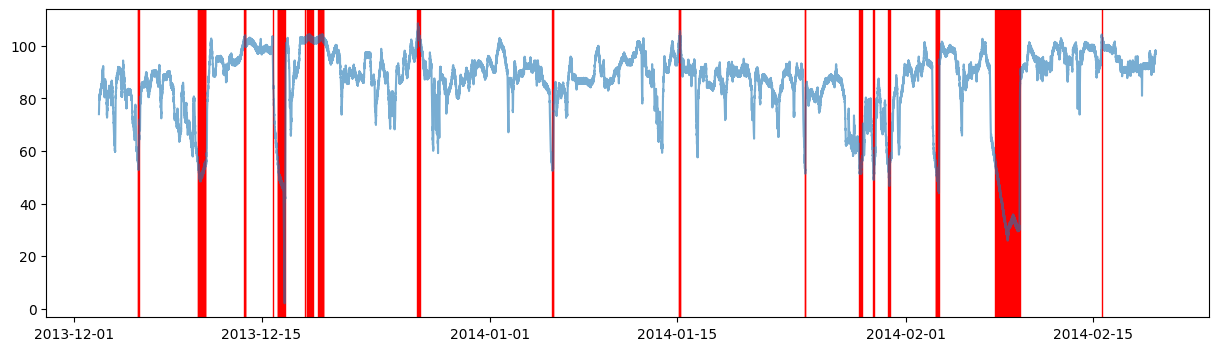

In [289]:
plt.figure(figsize =(15,4))

plt.plot(real_df["timestamp"], real_df["value"], label="metric", alpha=0.6)

for _,row in real_incident_summary.iterrows():
    plt.axvspan(
        row["incident_start"],
        row["incident_end"],
        color="red"
    )